# Асинхронность

В общем понимании, асинхронность это процесс выполнения нескольких задач одновременно, но не паралеллельно

На примере реальной жизни под  асинхронность можно подогнать следующую ситуацию:

`Утром меня поднимает с кровати будильник в телефоне. Я когда-то давно поставил его на 8:30 и с тех пор он исправно выполняет свою работу. Чтобы понять когда вставать, мне не нужно таращиться на часы всю ночь напролет. Нет нужды и периодически на них посматривать (скажем, с интервалом в 5 минут). Да я вообще не думаю по ночам о времени, мой мозг занят более интересными задачами — просмотром снов, например. Асинхронная функция "подъем" находится в режиме ожидания. Как только произойдет событие "на часах 8:30", она сама даст о себе знать`

`Иногда по выходным мы с собакой выезжаем на рыбалку. Добравшись до берега, я снаряжаю и забрасываю несколько донок с колокольчиками. И... Переключаюсь на другие задачи: разговариваю с собакой, любуюсь красотами природы, истребляю на себе комаров. Я не думаю о рыбе. Задачи "поймать рыбу удочкой N" находятся в режиме ожидания. Когда рыба будет готова к общению, одна из удочек сама даст о себе знать звонком колокольчика.`

# Терминология

- Корутины (Coroutines) - 
- Таски (Task) - 
- Футуры(фьючерсы)(Futures) -
- Хранилище событий (event_loop) - некий объект хранящий список всех событий, которые могут произойти в будущем. Это позволяет программе обрабатывать события в порядке их появления.


## Первое асинхронное приложение

In [2]:


import time


def fun1(x):
    print(x**2)
    time.sleep(3)
    print('fun1 завершена')
    
def fun2(y):
    print(y**0.5)
    time.sleep(3)
    print('fun2 завершена')
    
def main():
    fun1(4)
    fun2(4)
    
main()
    

16
fun1 завершена
2.0
fun2 завершена


В асинх.

In [ ]:
import asyncio


async def fun1(x):
    print(x**2)
    await asyncio.sleep(3)
    print('fun1 завершена')
    
async def fun2(y):
    print(y**0.5)
    await asyncio.sleep(3)
    print('fun2 завершена')

async def main_not_used(): # в этом случае задачи не будут пытаться выполняться параллельно
    await fun1(4) # т.к. сперва вызывается fun1, то fun2 будет ждать завершения fun1
    await fun2(4) # и только потом проиграется полседняя функция

async def main():
    task1 = asyncio.create_task(fun1(4))
    task2 = asyncio.create_task(fun2(4))
    await task1
    await task2

asyncio.run(main())
    

Что изменилось в коде?

1. Перед определениями функций появился префикс async. Он говорит интерпретатору, что функция должна выполняться асинхронно.

2. Вместо привычного time.sleep мы использовали asyncio.sleep. Это "неблокирующий sleep". В рамках функции ведет себя так же, как традиционный, но не останавливает интерпретатор в целом.

3. Перед вызовом асинхронных функций появился префикс await. Он говорит интерпретатору примерно следующее: "я тут возможно немного потуплю, но ты меня не жди — пусть выполняется другой код, а когда у меня будет настроение продолжиться, я тебе маякну".

4. На базе функций мы при помощи asyncio.create_task создали задачи (что это такое разберем позже) и запустили все это при помощи asyncio.run

Графическое представление того как работает синхронность и асинхронность наглядно

- 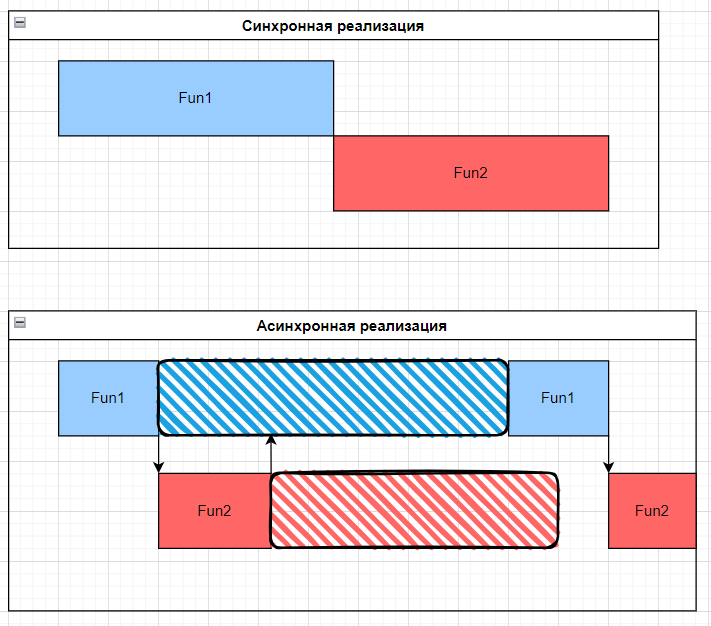

Как это работает:
- выполнилась быстрая часть функции fun1

- fun1 сказала интерпретатору "иди дальше, я посплю 3 секунды"

- выполнилась быстрая часть функции fun2

- fun2 сказала интерпретатору "иди дальше, я посплю 3 секунды"

- интерпретатору дальше делать нечего, поэтому он ждет пока ему маякнет первая проснувшаяся функция

- на доли миллисекунды раньше проснулась fun1 (она ведь и уснула чуть раньше) и отрапортовала нам об успешном завершении

- то же самое сделала функция fun2

In [ ]:
import asyncio
import time

async def fun1(x):
    print(x**2)
    await asyncio.sleep(3)
    print('fun1 завершена')
    
async def fun2(y):
    print(y**0.5)
    await asyncio.sleep(3)
    print('fun2 завершена')

st = time.time()


loop = asyncio.get_event_loop()
task1 = loop.create_task(fun1(4))
task2 = loop.create_task(fun2(4))
loop.run_until_complete( asyncio.wait([task1, task2]) )

print(time.time() - st)
